In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import torch
import tqdm
import seaborn as sns
from wordcloud import WordCloud
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset, DataLoader
import os


## Fake and True Datasets Loading

In [3]:
fake = pd.read_csv('Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
true = pd.read_csv('True.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## Assigning Labels

In [5]:
fake['Label'] = 0
true['Label'] = 1

In [6]:
dataset = pd.concat([fake, true], axis=0, ignore_index=True)
dataset.head()

,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


## Dataset Preprocessing

In [7]:
# Missing Values
missing = dataset.isnull().sum()
missing

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [8]:
# Dropping Unneccessary Columns
dataset.drop(['subject', 'date'], axis=1, inplace=True)
dataset

,title,text,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## WELfake Dataset

In [9]:
merged = pd.read_csv('merge.csv')
merged['Label'] = merged['label']
merged.drop(['label'], axis=1, inplace=True)
merged.head()

,title,text,Label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
2,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
3,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
4,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


## Merging Datasets [WELfake + True + Fake]

In [10]:
data = pd.concat([dataset, merged], axis=0, ignore_index=True)
print(data.head())
print(data.shape)
data.to_csv('data.csv')

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  Label  
0  Donald Trump just couldn t wish all Americans ...      0  
1  House Intelligence Committee Chairman Devin Nu...      0  
2  On Friday, it was revealed that former Milwauk...      0  
3  On Christmas day, Donald Trump announced that ...      0  
4  Pope Francis used his annual Christmas Day mes...      0  
(116435, 3)


PermissionError: [Errno 13] Permission denied: 'data.csv'

## Analyzing Label Distribution 

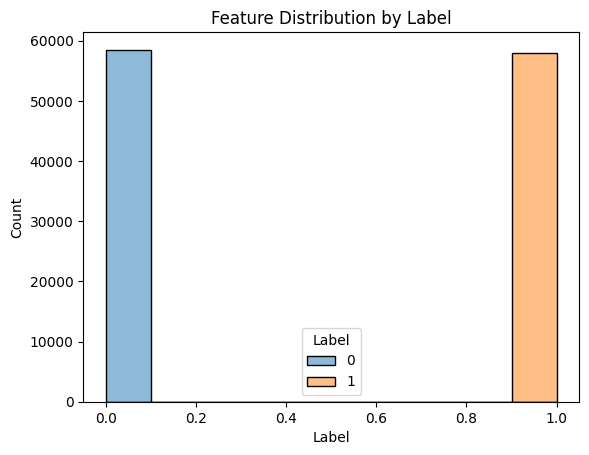

In [11]:
sns.histplot(data=data, x='Label', hue='Label', bins=10, kde=True)
plt.title("Feature Distribution by Label")
plt.show()

In [12]:
#Duplicates Removing
data.duplicated().sum()

14209

In [13]:
data = data.drop_duplicates()

In [14]:
data.shape

(102226, 3)

In [15]:
# Shuffle the dataframe
data = data.sample(frac=1,random_state=42) 
data.head()

,title,text,Label
29625,Israel's Netanyahu to speak with Trump on Sunday,JERUSALEM (Reuters) - Israeli Prime Minister B...,1
76626,Senate approves two FCC nominees as it reviews...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,0
61614,‘Half my family’ is here illegally!…State Sena...,https://www.youtube.com/watch?v=rUr8pYr5AXs,1
102300,"Kasich: Extreme Republicans, Democrats ’Ought ...","Sunday on CNN’s “State of the Union,” while di...",0
112523,ALL Of The GOP Candidates Would WRECK Our Env...,During the most recent Republican Presidential...,1


In [2]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,title,text,Label
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


## Titles and Text -> Tokenization

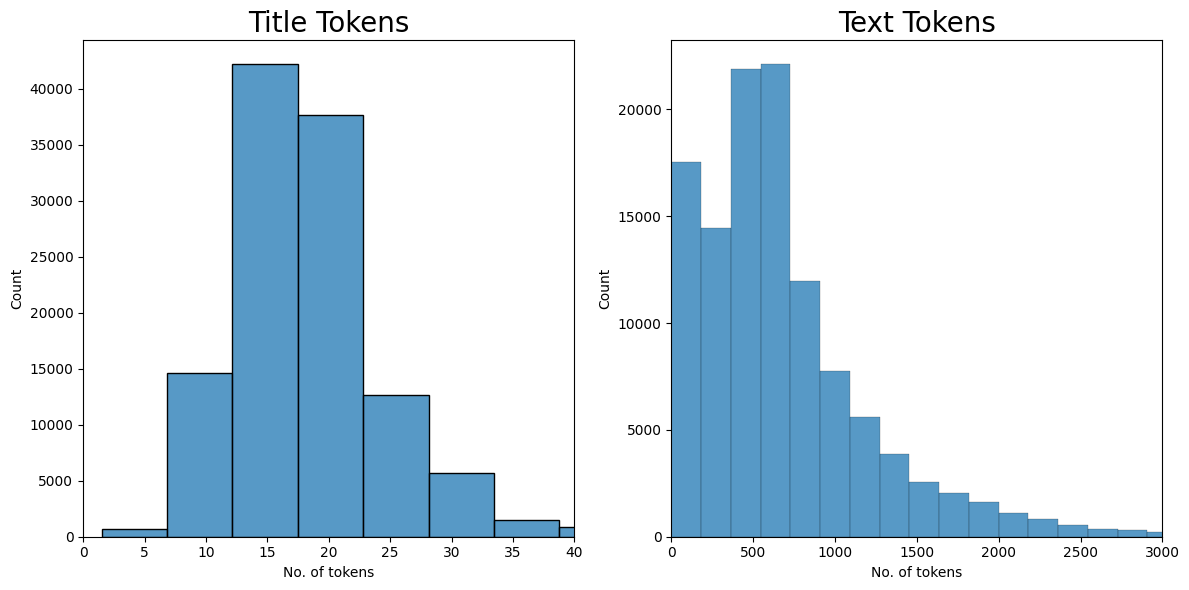

In [3]:
title_tokens = data['title'].apply(lambda x: len(x.split())*1.5)
text_tokens  = data['text'].apply(lambda x: len(x.split())*1.5)

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1 = sns.histplot(title_tokens,ax=ax1,bins=20)
ax1.set_xlabel('No. of tokens')
ax1.set_title("Title Tokens",fontsize=20)
ax1.set_xlim(0,40)

ax2 = sns.histplot(text_tokens,ax=ax2,bins=200)
ax2.set_xlabel('No. of tokens')
ax2.set_title("Text Tokens",fontsize=20)
ax2.set_xlim(0,3000)

plt.tight_layout()

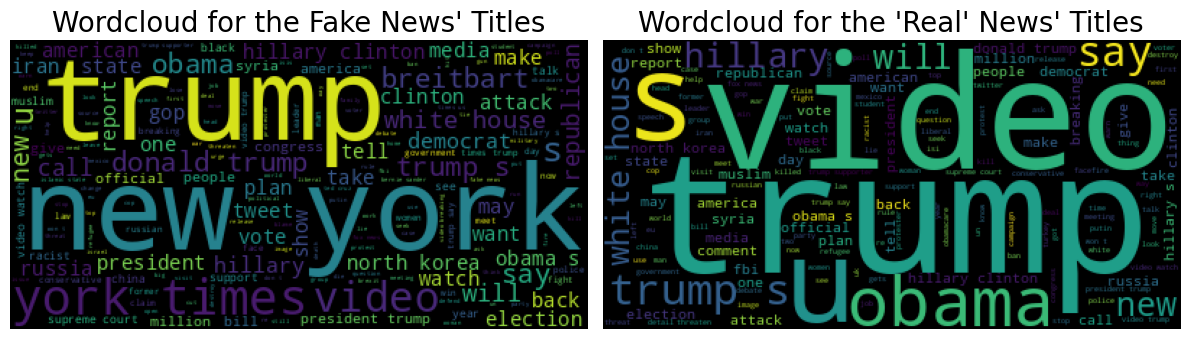

In [10]:
title_fake = ' '.join(data.loc[data.Label == 0]['title'])
title_real = ' '.join(data.loc[data.Label == 1]['title'])

wordcloud_fake = WordCloud().generate(title_fake)
wordcloud_real = WordCloud().generate(title_real)

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1.imshow(wordcloud_fake)
ax1.axis("off")
ax1.set_title("Wordcloud for the Fake News' Titles",fontsize=20)

ax2.imshow(wordcloud_real)
ax2.axis("off")
ax2.set_title("Wordcloud for the 'Real' News' Titles",fontsize=20)

plt.tight_layout()
plt.show()

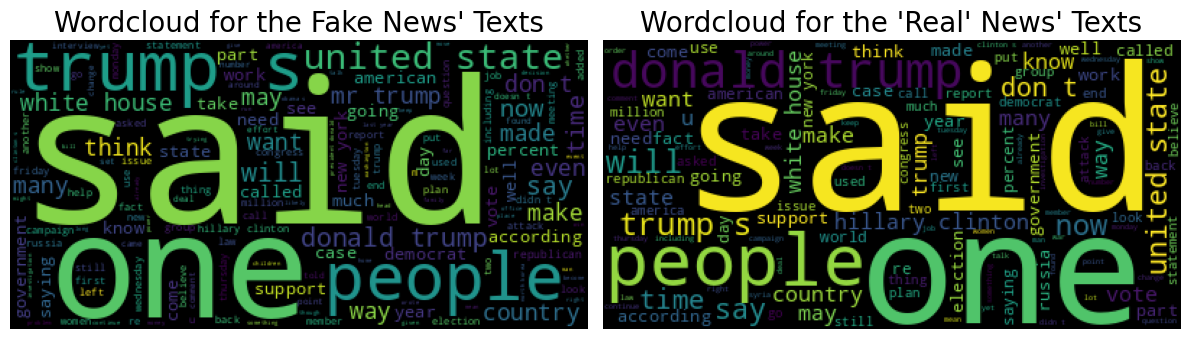

In [12]:
text_fake = ' '.join(data.loc[data.Label == 0]['text'])
text_real = ' '.join(data.loc[data.Label == 1]['text'])

wordcloud_fake = WordCloud().generate(text_fake)
wordcloud_real = WordCloud().generate(text_real)

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1.imshow(wordcloud_fake)
ax1.axis("off")
ax1.set_title("Wordcloud for the Fake News' Texts",fontsize=20)

ax2.imshow(wordcloud_real)
ax2.axis("off")
ax2.set_title("Wordcloud for the 'Real' News' Texts",fontsize=20)

plt.tight_layout()
plt.show()

## Text and Title Cleaning

In [5]:
import re
import string

def clean_text(text):

    text = text.lower()
    text = text.replace('\n', ' ')
    text = re.sub(r'\d+', ' ', text)
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text

data['title'] = data['title'].apply(clean_text)
data['text'] = data['text'].apply(clean_text)
data.head()

,Unnamed: 0,title,text,Label
0,0,donald trump sends out embarrassing new year’...,donald trump just couldn t wish all americans ...,0
1,1,drunk bragging trump staffer started russian ...,house intelligence committee chairman devin nu...,0
2,2,sheriff david clarke becomes an internet joke...,on friday it was revealed that former milwauke...,0
3,3,trump is so obsessed he even has obama’s name...,on christmas day donald trump announced that h...,0
4,4,pope francis just called out donald trump dur...,pope francis used his annual christmas day mes...,0


## Embedding

In [6]:
from sentence_transformers import SentenceTransformer

2025-06-19 14:34:01.584663: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-19 14:34:01.647271: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-19 14:34:01.650007: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-06-19 14:34:01.650018: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudar

In [7]:
model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast and good

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [13]:
# Title embeddings
title_embeddings = model.encode(data['title'].tolist(), show_progress_bar=True)

# Text embeddings
text_embeddings = model.encode(data['text'].tolist(), show_progress_bar=True)

Batches:   0%|          | 0/3639 [00:00<?, ?it/s]

Batches:   0%|          | 0/3639 [00:00<?, ?it/s]

In [15]:
len(text_embeddings[0])

384

In [24]:
# Combine embeddings
combined_embeddings = np.hstack([title_embeddings])  # shape = (num_samples, 768)

# Create new DataFrame
final_df = pd.DataFrame(combined_embeddings)
final_df['Label'] = data['Label'].values
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,Label
0,0.058249,0.064330,0.136759,-0.034808,0.069076,-0.088517,0.004210,-0.067877,-0.024042,-0.101543,...,-0.051788,-0.043865,0.011786,0.000523,0.027408,0.066671,-0.004627,-0.025096,-0.048137,0
1,-0.065020,-0.015925,-0.006295,0.038287,0.036682,-0.059877,0.012345,0.001202,0.059576,-0.042466,...,0.022963,0.049978,0.014299,-0.112861,-0.087814,0.038024,0.005719,-0.000831,0.019433,0
2,-0.036984,-0.010584,-0.086257,-0.037241,0.070292,-0.078079,0.120087,-0.030133,-0.000649,0.054468,...,-0.048742,-0.047336,0.021258,-0.059270,0.123048,-0.023370,0.048634,0.024802,-0.054251,0
3,0.059403,-0.010254,0.022963,-0.010677,-0.011520,-0.021527,0.037339,-0.063502,0.025487,-0.063343,...,-0.148132,0.054096,-0.026740,0.009046,0.053785,0.050771,0.026281,0.023859,-0.023766,0
4,0.047299,0.083340,0.038674,0.010043,0.008136,-0.040368,-0.012150,-0.000401,0.051112,-0.158181,...,0.045347,0.057859,0.016546,0.002041,-0.046944,-0.001668,-0.075856,0.029961,0.053958,0


In [27]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(final_df['Label'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    final_df.drop('Label', axis=1).values, labels, test_size=0.2, random_state=42
)

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test  = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test  = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32)

In [28]:
class BeautifulClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(BeautifulClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        return self.model(x)

input_dim = X_train.shape[1]
num_classes = len(set(labels))
model = BeautifulClassifier(input_dim, num_classes)

In [29]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Load checkpoint if exists
checkpoint_path = "checkpoint.pth"
start_epoch = 0

if os.path.exists(checkpoint_path):
    checkpoint = torch.load(checkpoint_path)
    model.load_state_dict(checkpoint["model_state"])
    optimizer.load_state_dict(checkpoint["optimizer_state"])
    start_epoch = checkpoint["epoch"] + 1
    print(f"Resuming from epoch {start_epoch}")
else:
    print("Starting training from scratch")

Starting training from scratch


In [30]:
num_epochs = 15

for epoch in range(start_epoch, num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {avg_loss:.4f}")

    # Save checkpoint after each epoch
    torch.save({
        "epoch": epoch,
        "model_state": model.state_dict(),
        "optimizer_state": optimizer.state_dict()
    }, checkpoint_path)


Epoch 1/15 - Loss: 0.6420
Epoch 2/15 - Loss: 0.6293
Epoch 3/15 - Loss: 0.6234
Epoch 4/15 - Loss: 0.6177
Epoch 5/15 - Loss: 0.6136
Epoch 6/15 - Loss: 0.6087
Epoch 7/15 - Loss: 0.6051
Epoch 8/15 - Loss: 0.6020
Epoch 9/15 - Loss: 0.5986
Epoch 10/15 - Loss: 0.5961
Epoch 11/15 - Loss: 0.5937
Epoch 12/15 - Loss: 0.5913
Epoch 13/15 - Loss: 0.5885
Epoch 14/15 - Loss: 0.5869
Epoch 15/15 - Loss: 0.5854


In [31]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 54.27%
